<a href="https://colab.research.google.com/github/MOKUAGU/Codes/blob/main/Copy_of_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
##Name: MUNACHI OKUAGU

Proposed Points (23.5 of 25):

# 1. Problem
State the problem you are trying to solve with this machine learning experiment. Include a description of the data, where you got the data, and what you're trying to predict..

The data I will be using contains different factors that affect a countries GDP the countries are european countries. The factors include the employment and unemployment rate in each country. The GDP breakdown by every quarter, inflation, interest per country, how a much a country is in debt, and the population (millions). 
The problem I am looking to solve is which algorithm will do the best trying to predict a countries GDP based off the given information in the data set. In this project I will be using the KNN algorithm, Decision trees, and random forests and test which one has the highest performance. 

I got the data from: https://www.kaggle.com/datasets/hanzlanawaz/economy-of-europe-2022 

# 2. Data Preparation
Explain your data preparation. What did you have to do to get your data in shape for your experiments? Why are you certain that you data is clean and prepared for use in your algorithms?

*your answer here*

In [ ]:
# load and prepare your data here

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import sklearn
import pandas as pd 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import neighbors
from sklearn.dummy import DummyClassifier

# load data
economic_data = pd.read_csv('/content/drive/MyDrive/CS167DATASETS/Economy_Indicators - Economy_Indicators.csv')
economic_data.head()

,Country,GDP,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
0,Euro Area,14493,4.1,0.8,1.25,10.0,6.6,-5.1,95.6,2.5,342.56
1,Germany,4223,1.7,0.1,1.25,10.0,5.5,-3.7,69.3,7.4,83.16
2,United Kingdom,3187,4.4,0.2,2.25,9.9,3.5,-6.0,95.9,-2.6,67.53
3,France,2937,4.2,0.5,1.25,5.6,7.4,-6.5,112.9,0.4,67.63
4,Italy,2100,5.0,1.1,1.25,8.9,7.8,-7.2,150.8,2.5,59.24


after loading in the data I want to take a look at the columns that I do not need and columns that have null values. I went ahead and dropped the country coliumn because I am looking to predict the GDP and the country column was not necessary to the running of this code. (also doing regression throughout the whole project so the column again is not needed) 

In [ ]:
countries = economic_data.copy()

countries.drop(columns=["Country"],inplace = True)

interest_mean = countries['Interest Rate'].mean()
q_mean = countries['GDP Quarter-over-Quarterr'].mean()
countries['Interest Rate'].fillna(interest_mean, inplace=True)
countries['GDP Quarter-over-Quarterr'].fillna(q_mean, inplace=True)

#countries = pd.get_dummies(countries, columns=['Country'])
print(countries.isna().any())

GDP                          False
GDP Year-over-Year           False
GDP Quarter-over-Quarterr    False
Interest Rate                False
Inflation Rate               False
Jobless Rate                 False
Gov. Budget                  False
Debt/GDP                     False
Current Account              False
Population                   False
dtype: bool


In [ ]:
target_value= 'GDP'
predictors = countries.columns.drop(target_value) 
train_data, test_data, train_sln, test_sln = train_test_split(countries[predictors], countries[target_value], test_size = 0.2, random_state=41)
train_data.head()

,GDP Year-over-Year,GDP Quarter-over-Quarterr,Interest Rate,Inflation Rate,Jobless Rate,Gov. Budget,Debt/GDP,Current Account,Population
15,6.0,1.5,1.25,10.5,5.70,-5.9,82.8,-0.5,8.93
36,5.9,1.5,3.63,16.8,30.17,-0.3,24.8,-2.1,3.46
4,5.0,1.1,1.25,8.9,7.80,-7.2,150.8,2.5,59.24
14,3.9,0.7,2.25,6.9,3.30,9.1,43.2,15.0,5.43
32,2.9,-1.0,1.25,22.2,6.60,-7.3,44.8,-2.9,1.89


made note of my target value, what I am looking to predict is the GDP 

Need to normalize the data to make sure that they carry the equal weight to optimize the predictions. 

In [ ]:
#normalize the data 

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_normalized = scaler.transform(train_data)
test_data_normalized = scaler.transform(test_data)


# 3. Research

Put your code and your experiments here.

In [ ]:
# code goes here... don't forget to include graphs. Professor Urness loves graphs.

In [ ]:
#KNN 
from sklearn import neighbors
from sklearn import metrics

# create our model #tuned
neigh = neighbors.KNeighborsRegressor(n_neighbors= 4)

# fit (train) the model to the data
neigh.fit(train_data_normalized, train_sln)

# use the trained model to get predictions from our test_data
predictions = neigh.predict(test_data_normalized)


# use a metric to see how good our predictions are; Don't miss this! Using Regression metrics here!!
print('MSE: ', metrics.mean_squared_error(test_sln, predictions))
print('r2: ', metrics.r2_score(test_sln, predictions))

MSE:  115651.22916666667
r2:  0.6794585043526784


overall running the nearest neighbor algorithm gave me the highest r2 value than any of the other algorithms. I tuned this a couple times by changing how many nearest neighbors but 4 is the optimal number to input there. I cant say I am surprised that nearest neighbors gave the best outcome, it is one of the best algorithms for predcition and regression. Although my r2 is not as high as I would like it to be this data was kind of complicated to work with and I think this may be the best it can predict. 

explain results: 

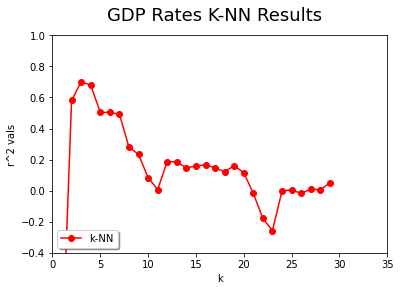

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics
 
# explore different values of k
k_vals = range(1,30)
r2_vals = []
for k in k_vals:
  neigh = neighbors.KNeighborsRegressor(n_neighbors = k ) 
  neigh.fit(train_data_normalized,train_sln)
  predictions = neigh.predict(test_data_normalized)
  r2_val = sklearn.metrics.r2_score(test_sln, predictions)
  r2_vals.append(r2_val)
 
plt.suptitle('GDP Rates K-NN Results',fontsize=18)
plt.xlabel('k')
plt.ylabel('r^2 vals')
plt.plot(k_vals,r2_vals,'ro-',label='k-NN')
 
plt.legend(loc='lower left', shadow=True)
plt.axis([0,35,-0.4,1]) 
plt.show()

Graph Explanation: 30 is the highest I can set my range to based off my dataset. the max value indicated in the graph is between 4 and 5 for the peak K. This graph shows that 5 is the peak and gradually we see a decline in results and the algorithms ability to predict the GDP. 

> Indented block



---



In [ ]:
# decision tree with default paramters
dt = tree.DecisionTreeRegressor(random_state = 7) #If None, then nodes are expanded until all leaves are pure or until all leaves contain less

# Call fit (to train regression model)
dt.fit(train_data_normalized,train_sln)

#Call predict to generate predictions
car_prices_predictions = dt.predict(test_data_normalized)

#Call a metric function to measure performance

print('MSE: ', metrics.mean_squared_error(test_sln, car_prices_predictions))
print("r2", metrics.r2_score(test_sln,car_prices_predictions))

MSE:  1295171.0
r2 -2.5897244884509587


before and after tuning my MSE stayed relatively the same value. When I started to tune my decision tree and adjust the max depth and random samples my r^2 value would range from negative four to negative 0.700. one of the main issues I have run into with my decision tree is trying to get the r2 value at least a positive value. The decision tree r2 performace was very low (bad) it is negative. I do not think this dataset was that good when working with a decision tree just based off the results. even after tuning different random states, the r2 was never positive. 

decision tree explanation: 

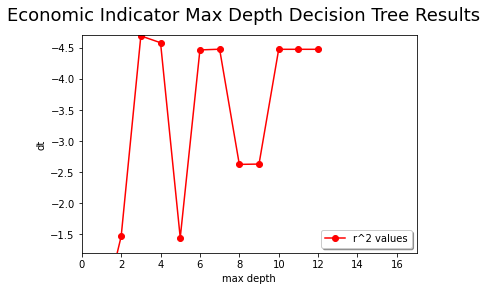

In [ ]:
# explore different values of k
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn.metrics


max_dt_vals = range(1,13)
r2_vals = []


for depth in max_dt_vals:
    dt = tree.DecisionTreeRegressor(random_state = 2, max_depth = depth)
    dt.fit(train_data_normalized,train_sln)
    predictions = dt.predict(test_data_normalized)
    r2_val = sklearn.metrics.r2_score(test_sln,predictions)
    r2_vals.append(r2_val)
    
plt.suptitle('Economic Indicator Max Depth Decision Tree Results',fontsize=18)
plt.xlabel('max depth')
plt.ylabel('dt')
plt.plot(max_dt_vals,r2_vals,'ro-',label='r^2 values')
plt.legend(loc='lower right', shadow=True)
plt.axis([0,17,-1.2,-4.7])
plt.show()

decision tree graph explanation: the decision tree graph looks interesting, this is not the graph i had expected but the graph clearly indicates my peak max depth and the lowest the tree went. The max depth shown in the graph is between 2 and 4 and the low point is below -1.5. When I was tuning the decision tree i found when I tried to adjust range it did not change much in terms of fitting the points onto the graph but I think overall the graph is not the best because the decision tree also did not perform that well with the dataset. 

In [ ]:
#random forest 
from sklearn.ensemble import RandomForestRegressor

# a Random Forest Regression
forest = RandomForestRegressor(random_state = 1, n_estimators=3, ccp_alpha = 2 )
forest.fit(train_data_normalized,train_sln)
predictions = forest.predict(test_data_normalized)
print("RANDOM FOREST accuracy score: ", metrics.r2_score(test_sln,predictions))



RANDOM FOREST accuracy score:  -1.64565978770607


the random forest I was expecting to run a bit better than how it did. I thought it would be able to take the best decision tree and print out a better accuracy. But again I think in this case it is more of an issue with the dataset than it is the algorithms in use. 

RANDOM FOREST ANALYSIS 

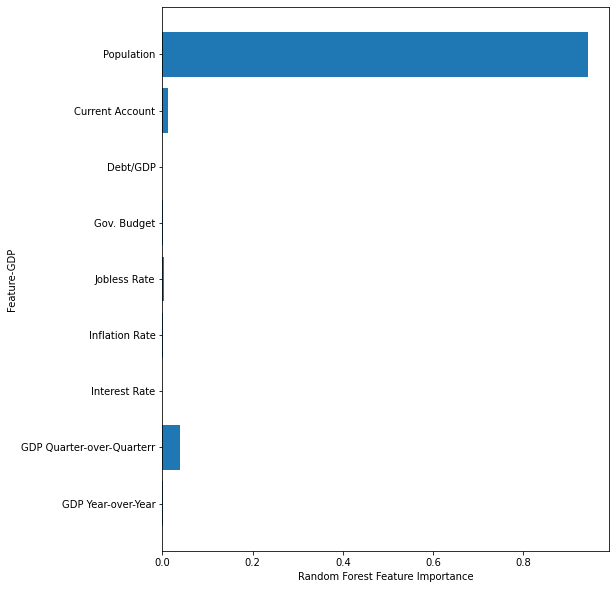

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

index = range(len(predictors)) #creates a list of numbers the right size to use as the index

plt.figure(figsize=(8,10)) #making the table a bit bigger so the text is readable
plt.barh(index,forest.feature_importances_,height=0.8) #horizontal bar chart
plt.ylabel('Feature-GDP')
plt.yticks(index,predictors) #put the feature names at the y tick marks
plt.xlabel("Random Forest Feature Importance")
plt.show()

graph findings: the graph was interesting the case that highlighted the population column of the data as the largest but I presumed because the data was normalized it would not put nearly as much weight on the population column than the other columns. I chose to do a line graph rather than a plotted graph because there were less columns that I would be looking at and i figured a line graph would be better to view my results. 

#4. Analysis

What did you discover? What insights/recommendations do you have? What did you find that was interesting? Which model was your best model, which models didn't work well? Why do you think this is? In general, I want a discussion of your experiment, the results, and what they mean.

What I discovered as I working through the project is that predicting the GDP for countries is overall difficult. Despite the overall efforts I wanted at least one of my algorithms to give an accuracy of above 75% or so and unfortunately none of them did. An insight I had if I did the project over was to maybe explore a couple more alogorithms and see if the data would have performed better had i tried some different regression algorithms. What I found to be interesting was how hard it is to try and work with economic data and getting accurate results. As for my models the K-Nearest Neighbors outperformed my two other models by a long shot. This algorithm gave me the highest r2 out of the three algorithms. The two that performed poorly (negative r2 vals) were the Random Forests and the Decision trees. I am not 100% sure why those two performed so badly but I think it was more issues with the data and what I was trying to do with the data rather than the actual algorithm. 

# 5. Bumps in the Road
What challenges did you encounter? How did you overcome these challenges?

I had a few bumps in the road when I was cleaning the data and trying to figure out which columns neeed to be dropped, which columns were just cluttering the data, and figuring out an effective method to do so. I overcame the challenges of partially cleaning the data manually and the rest through code. I had a couple issues with trying to raise my accuracy score (not as successful as I wanted it to be). I also had a couple issues with trying to figure out what numbers to use for my graphs because there were so many negative numbers in my dataset I had to make the x axis for a couple of my graphs negative to get better results. Overall I enjoyed this project and it was fun getting to start from scratch and work with a new data set and look at the results first hand! 